# Logistic Regression

The term logistic in logistic regression is used because this time we are applying another function to the weighted sum of input data and paratemeters of the model and this function is called logit (sigmoid) function.

Sigmoid function always outputs values between 0 and 1, and thus can be used to calculate probabilities of input data belonging to a certain class:

$ sigmoid(x) =  1 / (1 + e^{-x})  $

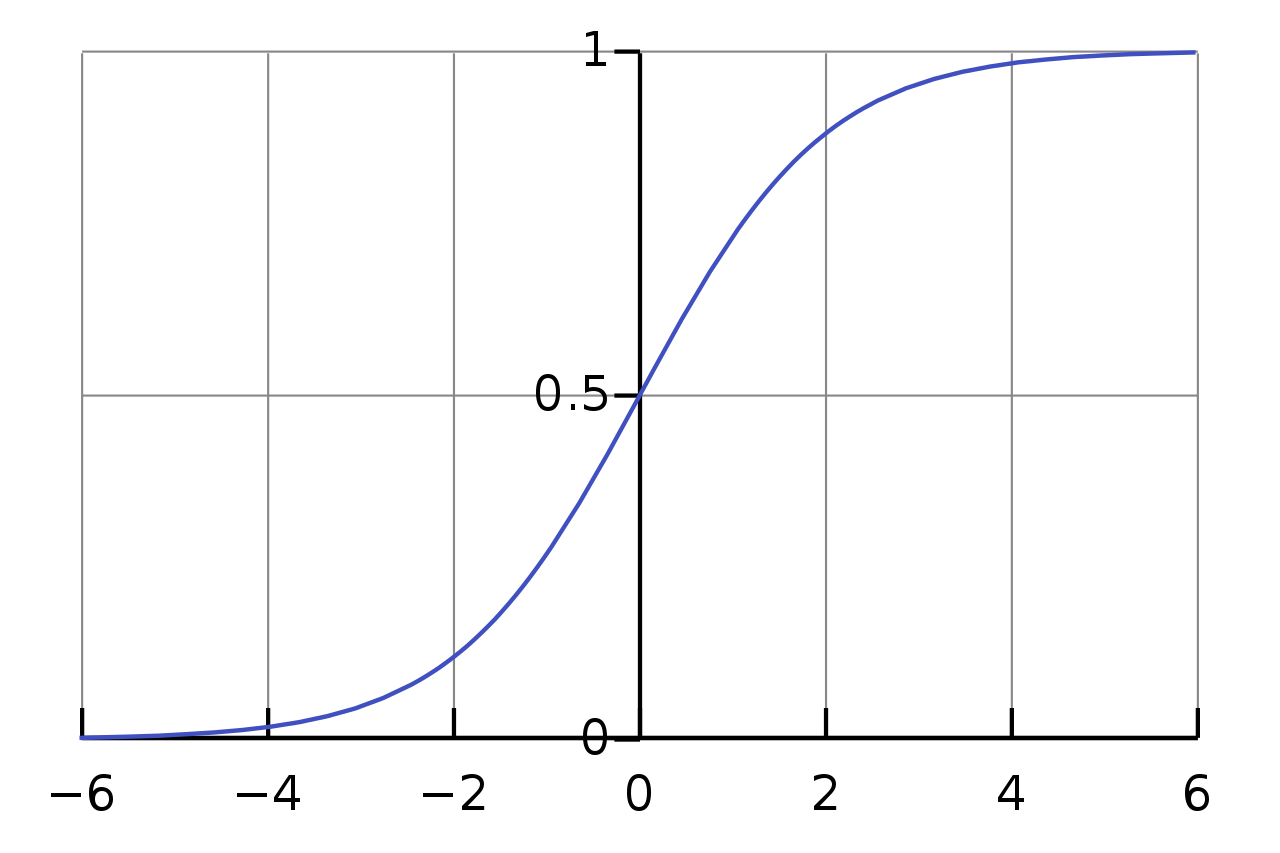

In [7]:
import numpy as np
import pandas as pd 
from math import exp
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data = pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


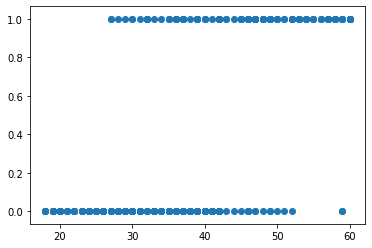

In [8]:
#Visualizing the dataset
# Taking one feature to explain step by step process
plt.scatter(data['Age'], data['Purchased'])
plt.show()


In [9]:
def normalize(X):
    return X - X.mean()

In [10]:
X = data['Age']
X

0      19
1      35
2      26
3      27
4      19
       ..
395    46
396    51
397    50
398    36
399    49
Name: Age, Length: 400, dtype: int64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,data['Purchased'],test_size=1/3,random_state=42)

In [199]:
# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):
    
    X = normalize(X)
    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

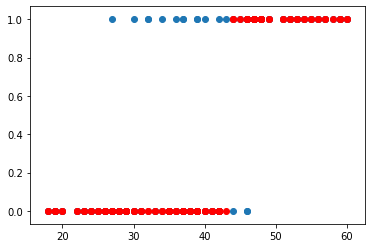

Accuracy = 0.8805970149253731


In [200]:
# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions

y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

# Using Scikit Learn

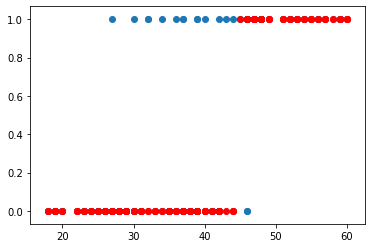

Accuracy = 0.8805970149253731


In [202]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")